In [1]:
include("Birkhoff_Functions/src/Birkhoff_Functions.jl")
using .Birkhoff_Functions

# using Plots #: histogram, font, default, scatter, gr, savefig, plot!
using Base.Threads
using JLD2
using FFTW
using LaTeXStrings
using Colors
using BSplineKit
using GenericFFT
using Plots.PlotMeasures
using Plots


### Defining Variables and Functions

In [48]:
const N_zeros = 16;
num_initial_conditions = 3000;
N_list = 200:200:2000; #2000
N_list=[300]
setprecision(60)
Birkhoff_Functions.default(size=(800, 600))

r = 1.4
map_right_range = 2pi
map_left_range = 0
map = Birkhoff_Functions.standard_map

# r = acos(0.24)
# map_right_range = 1;
# map_left_range = 1;
# map = Birkhoff_Functions.henon_map


standard_map (generic function with 1 method)

### Generate Initial Conditions and Evolve System to 2N ###

In [49]:
initial_conditions = Birkhoff_Functions.generate_ICs(num_initial_conditions, BigFloat, map_right_range, map_left_range);
# evolutions = Birkhoff_Functions.evolve_system_to_N(num_initial_conditions, map, r, deepcopy(initial_conditions), 2*N_list[length(N_list)]);

# JLD2.save_object("Standard_Map_IC_2000_Length_400", evolutions);
# JLD2.save_object("Henon_Map_IC_2000_Length_2000", evolutions);
# evolutions = JLD2.load_object("Henon_Map_IC_2000_Length_2000");
# JLD2.save_object("Henon_Map_IC_IC_2000_Length_2000.jld2", initial_conditions);
# initial_conditions = JLD2.load_object("Henon_Map_IC_IC_2000_Length_2000.jld2")
# initial_conditions = [t[1] for t in evolutions]
# evolutions = JLD2.load_object("Standard_Map_IC_2000_Length_2000");
# initial_conditions2 = JLD2.load_object("Standard_Map_IC_2000.jld2")
# evolutions_small = JLD2.load_object("Standard_Map_IC_2000_Length_400");

3000-element Vector{Vector{Tuple{BigFloat, BigFloat}}}:
 [(5.0981699092786598726, 0.86137223330772672014)]
 [(10.833981533299770206, 1.0803417624142879205)]
 [(8.3140702748869266259, 1.4618126408354039647)]
 [(1.3745800164262613752, 8.8216480185399639424)]
 [(3.6380879751221577578, 0.35876960038243194129)]
 [(6.7687425033936268193, 11.271906141662098477)]
 [(3.248128023446017032, 4.2593594033264325915)]
 [(5.3374611654513604009, 11.369142034592899293)]
 [(9.3579196287649697439, 1.9547924644691887508)]
 [(7.2318254531777128591, 5.7080410287177825168)]
 ⋮
 [(11.636866500814390335, 10.792016163845177701)]
 [(7.4293962845632455227, 3.1961442352910700571)]
 [(9.8510189395276039903, 10.761681261599004955)]
 [(4.6686569632788534889, 10.616308499336360782)]
 [(6.223398336611651871, 1.5254848429663163678)]
 [(11.826005416339762988, 2.5751019934290644287)]
 [(10.068287857646193828, 11.80694382086234917)]
 [(1.2034070331673814014, 5.8845298659163445265)]
 [(4.02480029866261102, 8.7816795841879962

In [46]:
using Plots
fig = plot(aspect_ratio=:auto, colorbar=true, label="", markerstrokewidth=0,markersize=0.5,legend=false,
xlabel = "x",
ylabel = "y",
ylims = (0,2pi),
xlims = (0,2pi))

# List of values corresponding to each list of (x, y) points
list_values = [t[2] for t in WBA_digT]
# print(list_values)

# Initialize empty lists for x, y, and zcolor values
x_all = []
y_all = []
z_all = []

evolutions = [Birkhoff_Functions.evolve_single_orbit_N(initial_conditions2[i], map, r, 300) for i in 1:N_list[end]]
# println("Evolutions: ", evolutions)
# Flatten data and associate each list of points with its value for zcolor
for (points, value) in zip(evolutions, list_values)
    # println("Points: ", points)
    append!(x_all, [p[1] for p in points[1]])  # x-coordinates
    append!(y_all, [p[2] for p in points[1]])  # y-coordinates
    append!(z_all, fill(value, length(points[1]))) # Color for each point in this list
    # println("x_all: ", x_all)
end
# println("x_all: ", x_all)
# println(length(y_all), " ",  "y_all: ", y_all)
# println(length(z_all), " ",  "z_all: ", z_all)
# Plot with zcolor for color scale
# scatter(fig, x_all, y_all, zcolor=z_all)

scatter(fig, x_all, y_all; zcolor = z_all, 
        markersize = 1, 
        markerstrokewidth = 0, 
        markershape = :circle, 
        color = :thermal, 
        legend = false, 
        colorbar = true,
        # dpi=200 # Quality of image.
    )

savefig("heatmap_quasi_orbits")


"/Users/harrison/Desktop/Birkhoff/heatmap_quasi_orbits.png"

### Finding Number of Quasiperiodic Orbits for Trajectory per N ###

In [4]:
# function num_quasi_per_N(N_list, evolutions, precision_type; vertical_shift, width)

#     num_quasi_orbits = zeros(precision_type,length(N_list));
#     orbit_convergence = nothing

#     for (i, N) in enumerate(N_list)
#         orbit_convergence = Birkhoff_Functions.calculate_WBA(evolutions, N, precision_type, vertical_shift, width)
        
#         # if (length(evolutions) == 1)
#         #     num_quasi_orbits[i] = orbit_convergence[1][2]
#         # else

#         for digT in getindex.(orbit_convergence, 2)
#             if (digT > N_zeros)
#                 num_quasi_orbits[i] += 1
#             end
#         end
#     end

#     # quasi_plot = Birkhoff_Functions.plot(N_list, num_quasi_orbits, title="Birkhoff Convergence", xlabel="N", legend=false)
    
#     return orbit_convergence, num_quasi_orbits
# end

### Dig_T Histogram


In [5]:
# using Plots.PlotMeasures
# gr()
# #r = 1.3
# N_list = [400,1300,4000] #2000

# using LaTeXStrings


# histogram_plot = histogram(
#     # title="\nDistribution of Dig"*L"_T", 
#     xlabel="dig"*L"_T", 
#     ylabel="Proportion", 
#     aspect_ratio=:auto, 
#     size=(1000, 800),
#     left_margin=10mm,
#     top_margin=10mm,
#     legend=true, 
#     legendtitle="T"
# )

# # bin_edges = range(1, stop=50, length=30)  # 30 bins
# alpha_list = range(0.4, stop=0.55, length=length(N_list))


# WBA_digT_list = [Vector{Tuple{Any, Any}}() for _ in 1:length(N_list)]

# for i in range(1,length(N_list))
#     WBA_digT_list[i] = num_quasi_per_N(N_list[i], evolutions, BigFloat, vertical_shift=0, width=1)[1];
# end


# for i in range(1,length(N_list))
#     convergence_metric = [floor(Int,orbit[2]) for orbit in WBA_digT_list[i] if orbit[2] != Inf];
#     histogram!(histogram_plot, convergence_metric, bins=bin_edges, alpha = alpha_list[i], label = N_list[i], normalize=true)
# end

# display(histogram_plot)

In [6]:
# using Plots.PlotMeasures
# gr()
# r_list = [1, 1.3, 2.5]
# N_list = [1500]

# using LaTeXStrings

# histogram_plot = histogram(
#     # title="\nDistribution of Dig"*L"_T", 
#     xlabel="dig"*L"_T", 
#     ylabel="Proportion", 
#     aspect_ratio=:auto, 
#     size=(1000, 800),
#     left_margin=10mm,
#     top_margin=10mm,
#     legend=true, 
#     legendtitle="Perturbation Strength (r)"
# )

# # bin_edges = range(1, stop=50, length=30)  # 30 bins
# alpha_list = range(0.4, stop=0.6, length=length(r_list))


# WBA_digT_r_list = [Vector{Tuple{Any, Any}}() for _ in 1:length(r_list)]

# for i in range(1,length(r_list))
#     evolutions = Birkhoff_Functions.evolve_system_to_N(num_initial_conditions, map, r_list[i], deepcopy(initial_conditions), 2*N_list[end]);
#     WBA_digT_r_list[i] = num_quasi_per_N(N_list[end], evolutions, BigFloat, vertical_shift=0, width=1)[1];
# end


# for i in range(1,length(r_list))
#     convergence_metric = [floor(Int,orbit[2]) for orbit in WBA_digT_r_list[i] if orbit[2] != Inf];
#     histogram!(histogram_plot, convergence_metric, bins=bin_edges, alpha = alpha_list[i], label = r_list[i], normalize=true)
# end

# display(histogram_plot)

In [7]:
# savefig("Dig_T_histogram2.pdf")

### Weighted Birkhoff Convergence (Number of Quasi) ###

In [29]:
# # Weighted Birkhoff number of quasi orbits
# WBA_digT, num_quasi, quasi_100 = num_quasi_per_N(N_list, evolutions, BigFloat, vertical_shift=0, width=1);

compare_second_index(value1, value2) = value1[2] < value2[2]
# WBA_digT = sort(num_quasi_per_N(N_list, evolutions, BigFloat, vertical_shift=0, width=1)[1], lt=compare_second_index);
# WB_N_quasi_plot = Birkhoff_Functions.plot(N_list, WBN_length_quasi_orbits, title= "Weighted Birkhoff Convergence", ylabel="Number of Convergent Orbits", xlabel="N", legend=false, aspect_ratio=:auto)
# display(WB_N_quasi_plot) # WBN_length_quasi_orbits

# # Uniform Birkhoff - number of quasi orbits
# # flat_orbit_convergence, flat_length_quasi_orbits = num_quasi_per_N(N_list, evolutions, BigFloat, vertical_shift=1, width=1);
# # flat_quasi_plot = Birkhoff_Functions.plot(N_list, flat_length_quasi_orbits, title= "Uniform Birkhoff Convergence", ylabel="Number of Convergent Orbits", xlabel="N", legend=false)
# # display(flat_quasi_plot)
# ;

compare_second_index (generic function with 1 method)

In [45]:
# JLD2.save_object("Henon_Map_IC_2000_Length_2000_digT", WBA_digT)
WBA_digT = JLD2.load_object("Henon_Map_IC_2000_Length_2000_digT")#sort(, lt=compare_second_index);
# WBA_digT = JLD2.load_object("Standard_Map_IC_2000_Length_2000_digT");

2000-element Vector{Tuple{Int64, BigFloat}}:
 (1, 4.0182433554762460107)
 (2, 24.903313693292170733)
 (3, 3.3098338996429986711)
 (4, 7.9332089075256438798)
 (5, 3.7262090530841266607)
 (6, 12.256269391623201573)
 (7, 9.7410551125145729834)
 (8, 5.8461038684136935606)
 (9, 5.4110158143262493194)
 (10, 3.4731874239278332228)
 ⋮
 (1992, 3.3354343320784662665)
 (1993, 6.1329005643271484044)
 (1994, 19.792393068951866286)
 (1995, 41.78143995919347542)
 (1996, 28.419946284029866196)
 (1997, 3.3186720287820528352)
 (1998, 10.552815138406181031)
 (1999, 5.4115378281686983969)
 (2000, 3.4242592403306758783)

### Saving Convergent Orbits

In [10]:
# quasi_orbits = Tuple{Int, Int}[];

# for i in 1:length(WB_N_orbit_convergence)
#     if (WB_N_orbit_convergence[i][2] > N_zeros)
#         push!(quasi_orbits, (i,floor(Int,WB_N_orbit_convergence[i][2])))
#     end
# end;

# Birkhoff_Functions.save_quasi_periodic_orbits(evolutions, quasi_orbits, N_list[end]);

# function find_tuple_by_first_index(arr, target)
#     index = findfirst(x -> x[1] == target, arr)
#     return index === nothing ? nothing : arr[index]
# end
# find_tuple_by_first_index(WBA_digT, 3)

In [5]:
function get_phase_space(orbit, r, N, map)
    orbit_identifier = "Phase_Space/digT_" * string(Float64(round(orbit[2]; sigdigits=3))) * "_index_" * string(orbit[1]) * ".png"
    scatter_dump = Tuple{Float64, Float64}[];
    long_orbit = Birkhoff_Functions.evolve_single_orbit_N(orbit, map, r, N)
    for evolution in long_orbit
        for singular_orbit in evolution
            push!(scatter_dump, singular_orbit)
        end
    end

    scatter_dump = [getindex.(scatter_dump, i) for i in 1:length(scatter_dump[1])]
    Birkhoff_Functions.gr(aspect_ratio=1, legend=:none)
    fig = Birkhoff_Functions.scatter(scatter_dump[1], scatter_dump[2]; markersize=0.3, title = "Phase Space", xlabel="x", ylabel="y", xlims=(-map_left_range,map_right_range), ylims=(-map_left_range,map_right_range))
    # savefig(orbit_identifier)
    return fig
end

get_phase_space (generic function with 1 method)

### Find orbits within bounded DigT ###

In [18]:
possible_cantor_set_orbits = Tuple{Int, BigFloat}[]

for i in 1:num_initial_conditions
    if (19 < WBA_digT[i][2] < 22)
        push!(possible_cantor_set_orbits, WBA_digT[i])
    end
end

println(length(possible_cantor_set_orbits))

chaotic_orbits = Tuple{Int, BigFloat}[]

for i in 1:num_initial_conditions
    if (0 < WBA_digT[i][2] < 4.5)
        push!(chaotic_orbits, WBA_digT[i])
    end
end

println(length(chaotic_orbits))

quasi_orbits = Tuple{Int, BigFloat}[]

for i in 1:num_initial_conditions
    if (41 < WBA_digT[i][2] < 100)
        push!(quasi_orbits, WBA_digT[i])
    end
end

println(length(quasi_orbits))

24
765
3


In [22]:
N=80000
N=1000
orbit_index = 3
orbit = initial_conditions[[quasi_orbits[orbit_index][1]][1]]

single_evolution = Birkhoff_Functions.evolve_single_orbit_N(orbit, map, r, N)
# println(orbit_index, " ",  Birkhoff_Functions.calculate_WBA(single_evolution, Int(N/2), BigFloat, 0 ,1))

phase_space = get_phase_space(orbit, r, N, map)
plot(phase_space)
Birkhoff_Functions.savefig("test")

"/Users/harrison/Desktop/Birkhoff/test.png"

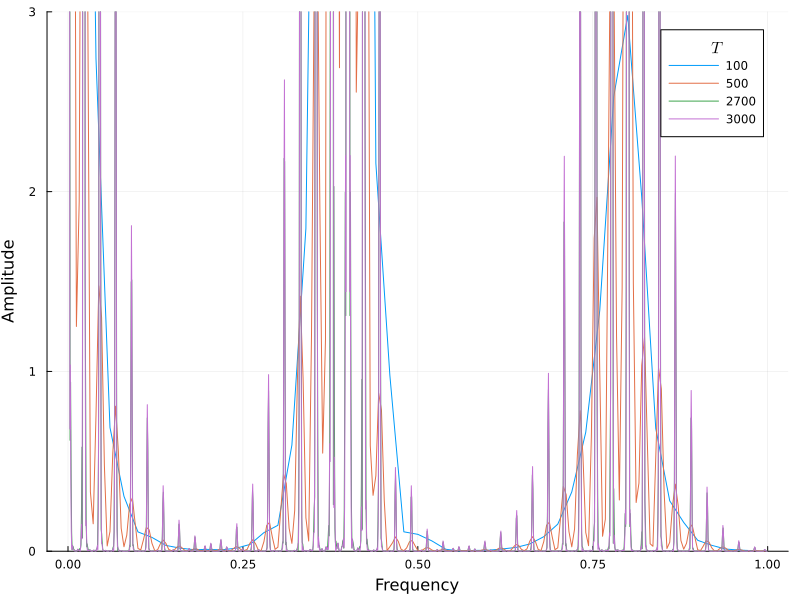

In [23]:
# gr()

orbit = [quasi_orbits[end]]

# widths = [0.0000001, 0.000001, 0.0001, 0.001, 0.1, 0.5, 5, 10, 100, 140, 180];
# widths = [0.0000001, 0.001, 0.1, 1, 10, 100, 140];
shifts = [0, 1e-12, 1e-9, 1e-6,1e-3,1] #[0,1]
widths = [0.01,0.1,1,5,20,50] #[0,1]
widths=[1]

types = [["Width", widths]]
spectral_leakage_shift = nothing
spectral_leakage_width = nothing
observable = nothing

main_plot = nothing

# plot_label = [L"\hat{f}_{B,0}", L"\hat{f}_{W,0}"]
# y = 10.0 .^ (-16:0)  # Data that fits well in a log-log plot
# num_yticks = 5
# ytick_positions = exp10.(range(log10(minimum(y)), log10(maximum(y)), length=num_yticks))

plot_decay_mean = plot(
    xlabel="T", 
    ylabel="Error", 
    xaxis=:log, 
    yaxis=:log, 
    c=:auto,
    aspect_ratio=:auto,
    legend=:bottomleft,
    legendtitle= L"v",
    # yticks=ytick_positions
)

i = 1
for type in types
    
    main_plot = plot(
        xlabel="Frequency", 
        ylabel="Amplitude", 
        # legendtitle=type[1],
        # title="Power Spectrum of " * string(round(orbit[1][2]; sigdigits=3)) * " Orbit",
        titlefont=font(10),
        legend=:topright,
        c=:auto,
        aspect_ratio=:auto,
        legendtitle=L"T",
        # ylims=(0,2000),
        # xlims=(-0.1165,-0.1155),
        # dpi=200
        # xlims=(0.365,0.4),
        ylims=(0,3),
        # xlims=(0.2,0.6)
    )

    total_variation = []
    area1 = []

    
    for parameter in type[2]
        # N_list_2 = [300, 2300, 4300, 6300, 8300, 50000] #3000
        # N_list_2 = [10, 100, 300, 500, 1000, 1300, 1600, 1900, 2100, 2400, 2700,3000] #3000
        N_list_2 = [100, 500, 2700,3000] #3000

        # N_list_2 = round.(Int, LinRange(200, 1000, 4))
        # N_list_2 = [100, 1000, 2000, 3000] #3000
        # colors = cgrad(:darkrainbow, length(N_list_2), categorical = true)

        # N_list_2 = [1000]

        area = []
        zeroth_F_coeff = []

        if (type[1] == "Shift")
            shift = parameter
            width = 1
        else
            shift = 0
            width = parameter
        end

        for n in N_list_2
            shifted_k = fftshift(fftfreq(n));

            single_evolution = Birkhoff_Functions.evolve_single_orbit_N(initial_conditions[orbit[1][1]], map, r, n)
            # println(single_evolution)
            observable = Birkhoff_Functions.compute_singular_observed_trajectory(single_evolution[1], n, BigFloat, vertical_shift=BigFloat(shift), width=BigFloat(width))

            step_length = step(shifted_k)  
            normalisation = step_length/3*(observable[1]+2*sum(observable[3:2:end-2])+4*sum(observable[2:2:end])+observable[end])
            # normalised_observable = observable ./ normalisation
            shifted_fft = abs.(GenericFFT.fft(observable)[1:n÷2])
            
            # normalise area by integrating simpson's rule
            normalisation = step_length/3*(shifted_fft[1]+2*sum(shifted_fft[3:2:end-2])+4*sum(shifted_fft[2:2:end])+shifted_fft[end])

            append!(zeroth_F_coeff, shifted_fft[1] ./ normalisation)

            # append!(area2,normalisation)
            normalised_shifted_fft = shifted_fft ./ normalisation

            shifted_k = fftshift(fftfreq(floor(Int,n/2)));

            steps = 0:2/n:1-1/n

            # Plot the magnitude of Fourier coefficients
            # Birkhoff_Functions.display(plot(1:length(signal_fft), mag_fft, yscale=:log10, xscale=:log10, xlims=(1000,30000), xlabel="Frequency Index", ylabel="Magnitude", c=:auto,aspect_ratio=:auto,title="Fourier Coefficient Decay"))
        
            Birkhoff_Functions.plot!(main_plot, steps, normalised_shifted_fft, label=N_list_2[i])#, color=colors[i])
            # Birkhoff_Functions.savefig(power_spectrum_parameter)
            i += 1

        end
    #    plot!(plot_decay_mean, N_list_2, zeroth_F_coeff, label=shifts[i], color=colors[i])
    end
    Birkhoff_Functions.display(main_plot)
end
# Birkhoff_Functions.display(plot_decay_mean)

# l = @layout [grid(1,2){0.4h}; b{0.6h}]
# l = @layout [grid(1,2){0.3h}; b{0.65h}; c{0.25w} d{0.5w} e];

# phase_space = get_phase_space(orbits_selection[1], r, 200000, map)
# plot(phase_space)
# Birkhoff_Functions.savefig("test")

# phase_space = get_phase_space(orbit, r, 20000, map)
# phase_space = get_phase_space(orbit, r, 200, map)

# Birkhoff_Functions.display(plot(spectral_leakage_shift, spectral_leakage_width, phase_space, layout=l))
# Birkhoff_Functions.display(plot(spectral_leakage_shift, phase_space, main_plot, layout=l))

# Birkhoff_Functions.savefig("Orbit_Summary2" * orbit_identifier)
# end

In [16]:
# Birkhoff_Functions.savefig("Spectra_Shift_v_convergence_tip.pdf")

In [17]:
function g(t, tmax, width1,width2)

    if (t == 0 || t == 1)
        return 0
    else
        return width2*exp(-width1/(t*(1-t)))
    end
end

my_plot = plot(xlims=(0,1), ylabel=L"g_w", xlabel ="t", legend=:topright, legendtitle = L"w")

max_N = 100
x = 0:0.5/max_N:1

widths = [(0.01,1.11069498065), (0.1, 2.02000365223),(1,142.250375777), (3, 672883.362422), (6, 1.5e11)]

for width in widths
    y = g.(x, max_N, width[1], width[2])
    plot!(my_plot, x, y, c=:auto, aspect_ratio=:auto, label = width[1])
end
display(my_plot)

In [18]:
function g(t, tmax, v_shift)

    if (t == 0 || t == 1)
        return 0
    else
        return 142.250375777*(1-v_shift)*exp(-1/(t*(1-t)))+v_shift
    end
end

my_plot = plot(xlims=(0,1), ylabel=L"g_v", xlabel ="t", legend=:topright, legendtitle = L"v")

max_N = 1000
x = 0:0.5/max_N:1

v_shifts = [0, 0.2, 0.55, 0.85, 1]

for v_shift in v_shifts
    y = g.(x, max_N, v_shift)
    plot!(my_plot, x, y, c=:auto, aspect_ratio=:auto, label = v_shift)
end
display(my_plot)
Birkhoff_Functions.savefig("shift_v.pdf")

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path clip-path="url(#clip490)" d="M210.705 2242.24 Q207.093 2242.24 205.265 2245.8 Q203.459 2249.34 203.459 2256.47 Q203.459 2263.58 205.265 2267.15 Q207.093 2270.69 210.705 2270.69 Q214.339 2270.69 216.144 2267.15 Q217.973 2263.58 217.973 2256.47 Q217.973 2249.34 216.144 2245.8 Q214.339 2242.24 210.705 2242.24 M210.705 2238.53 Q216.515 2238.53 219.57 2243.14 Q222.649 2247.72 222.649 2256.47 Q222.649 2265.2 219.57 2269.81 Q216.515 2274.39 210.705 2274.39 Q204.894 2274.39 201.816 2269.81 Q198.76 2265.2 198.76 2256.47 Q198.76 2247.72 201.816 2243.14 Q204.894 2238.53 210.705 2238.53 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip490)" d="M255.936 2242.24 Q252.325 2242.24 250.496 2245.8 Q248.69 2249.34 248.69 2256.47 Q248.69 2263.58 250.496 2267.15 Q252.325 2270.69 255.936 2270.69 Q259.57 2270.69 261.376 2267.15 Q263.204 2263.58 263.204 2256.47 Q263.204 2249.34 261.376 2245.8 Q259.57 2242.24 255.936 2242.24 M255.936 2238.53 Q261.746 2238.53 264.801 2243.14 Q267.88 2247.72 267.88 2256.47 Q267.88 2265.2 264.801 2269.81 Q261.746 2274.39 255.936 2274.39 Q250.126 2274.39 247.047 2269.81 Q243.991 2265.2 243.991 2256.47 Q243.991 2247.72 247.047 2243.14 Q250.126 2238.53 255.936 2238.53 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip490)" d="M795.39 2242.24 Q791.779 2242.24 789.951 2245.8 Q788.145 2249.34 788.145 2256.47 Q788.145 2263.58 789.951 2267.15 Q791.779 2270.69 795.39 2270.69 Q799.025 2270.69 800.83 2267.15 Q802.659 2263.58 802.659 2256.47 Q802.659 2249.34 800.83 2245.8 Q799.025 2242.24 795.39 2242.24 M795.39 2238.53 Q801.2 2238.53 804.256 2243.14 Q807.335 2247.72 807.335 2256.47 Q807.335 2265.2 804.256 2269.81 Q801.2 2274.39 795.39 2274.39 Q789.58 2274.39 786.501 2269.81 Q783.446 2265.2 783.446 2256.47 Q783.446 2247.72 786.501 2243.14 Q789.58 2238.53 795.39 2238.53 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip490)" d="M834.649 2269.78 L850.969 2269.78 L850.969 2273.72 L829.024 2273.72 L829.024 2269.78 Q831.686 2267.03 836.27 2262.4 Q840.876 2257.75 842.057 2256.41 Q844.302 2253.88 845.182 2252.15 Q846.084 2250.39 846.084 2248.7 Q846.084 2245.94 844.14 2244.21 Q842.219 2242.47 839.117 2242.47 Q836.918 2242.47 834.464 2243.23 Q832.034 2244 829.256 2245.55 L829.256 2240.83 Q832.08 2239.69 834.534 2239.11 Q836.987 2238.53 839.024 2238.53 Q844.395 2238.53 847.589 2241.22 Q850.784 2243.91 850.784 2248.4 Q850.784 2250.53 849.973 2252.45 Q849.186 2254.34 847.08 2256.94 Q846.501 2257.61 843.399 2260.83 Q840.297 2264.02 834.649 2269.78 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /><path clip-path="url(#clip490)" d="M1378.24 2242.24 Q1374.62 2242.24 1372.8 2245.8 Q1370.99 2249.34 1370.99 2256.47 Q1370.99 2263.58 1372.8 2267.15 Q1374.62 2270.69 1378.24 2270.69 Q1381.87 2270.69 1383.68 2267.15 Q1385.5 2263.58 1385.5 2256.47 Q1385.5 2249.34 1383.68 2245.8 Q1381.87 2242.24 1378.24 2242.24 M1378.24 2238.53 Q1384.05 2238.53 1387.1 2243.14 Q1390.18 2247.72 1390.18 2256.47 Q1390.18 2265.2 1387.1 2269.81 Q1384.05 2274.39 1378.24 2274.39 Q1372.43 2274.39 1369.35 2269.81 Q1366.29 2265.2 1366.29 2256.47 Q1366.29 2247.72 1369.35 2243.14 Q1372.43 2238.53 1378.24 2238.53 Z" fill="#000000" fill-rule="nonzero" fill-opacity="1" /> <path clip-path="url(#clip490)" d="M1962.28 2242.24 Q1958.67 2242.24 1956.85 2245.8 Q1955.04 2249.34 1955.04 2256.47 Q1955.04 2263.58 1956.85 2267.15 Q1958.67 2270.69 1962.28 2270.69 Q1965.92 2270.69 1967.72 2267.15 Q1969.55 2263.58 1969.55 2256.47 Q1969.55 2249.34 1967.72 2245.8 Q1965.92 2242.24 1962.28 2242.24 M1962.28 2238.53 Q1968.1 2238.53 1971.15 2243.14 Q1974.23 2247.72 1974.23 2256.47 Q1974.23 2265.2 1971.15 2269.81 Q1968.1 2274.39 1962.28 2274.39 Q1956.47 2274.39 1953.4 2269.81 Q1950.34 2265.2 1950.34 2256.47 Q1950.34 2247.72 1953.4 2243.14 Q1956.47 2238.53 1962.28 2238.53 Z" fill="#000000" fill-rule="

InterruptException: InterruptException:

In [19]:
# using FFTW, Plots

# # Define the rectangular window
# function rectwin(N)
#     return [i <= N/2 ? 1 : 0 for i in 1:N]
# end

# # Calculate the Fourier transform
# N = 1024
# x = rectwin(N)
# fourier_transform = fft(x)

# # Get the frequencies for the Fourier transform
# frequencies = fftshift(fftfreq(N))

# # Plot the magnitude of the Fourier transform (shifted to center)
# plot(frequencies, real.(fftshift(fourier_transform)), xlabel="Frequency", 
# ylabel="Magnitude", label="Fourier Transform of Window Function", 
# title="Fourier Plot of Hann Window", c=:auto,
# aspect_ratio=:auto)


In [20]:
# using FFTW, Plots

# function rect(t, tmax)
#     if (t < -tmax/3 || t > tmax/3)
#         return 0
#     else
#         return 1
#     end
# end

# function g(t, tmax)
#     if (t == 0 || t == 1)
#         return 0
#     else
#         return 142.250375777*exp(-1/((t)*(1-t)))
#     end
# end

# my_plot = plot(xlims=(-25,25), ylabel="Ampltidue", xlabel ="Frequency", legend=:topright)

# max_N = 20
# x = -max_N:0.8:max_N
# println(length(x))

# y = rect.(x, max_N)

# original_k = 1:length(x)
# shifted_k = fftshift(fftfreq(length(x))*length(x))

# shifted_fft = fftshift(fft(y))

# plot!(my_plot, shifted_k, abs.(shifted_fft),c=:auto, aspect_ratio=:auto, label = "Rectangular Window")


# max_N = 40
# x = 0:0.8/max_N:1
# println(length(x))
# y = g.(x, max_N)

# original_k = 1:length(x)
# shifted_k = fftshift(fftfreq(length(x))*length(x))

# shifted_fft = 0.6.*fftshift(fft(y))

# plot!(my_plot,1.2.*shifted_k, abs.(shifted_fft),c=:auto, aspect_ratio=:auto, label =L"C^{\infty}"* " Bump Window")

# display(my_plot)

In [21]:
# savefig("windowing_convolution.pdf")

### Fourier Analysis

In [22]:
# N_fft = 1000
# orbits_selection = [quasi_orbits[end]]

# TV_shift = []
# # TV_width = []
# # shifts = [0.0000001, 0.00001, 0.0001, 0.001, 0.01, 1];
# # widths = [0.0000001, 0.000001, 0.0001, 0.001, 0.1, 0.5, 5, 10, 100, 140, 180];
# shifts = [0,1]

# types = [["Shift", shifts, TV_shift]]
# # types = [["Width", widths, TV_width]]

# spectral_leakage_shift = nothing
# spectral_leakage_width = nothing

# observable = nothing

# # for orbit in orbits_selection
# #     # orbit_identifier = "/digT_" * string(Float64(round(orbit[2]; sigdigits=3))) * "_index_" * string(orbit[1]) * ".png"

# main_plot = nothing
# for type in types
#     main_plot = plot(
#         xlabel="Frequency", 
#         ylabel="Amplitude", 
#         legendtitle=type[1],
#         title="Power Spectrum of " * string(round(orbit[2]; sigdigits=3)) * " Orbit",
#         titlefont=font(10),
#         legend=:topright,
#         c=:auto,
#         aspect_ratio=:auto,
#         # ylims=(0,2000),
#         # xlims=(-0.1165,-0.1155),
#         # dpi=200
#         # xlims=(0.365,0.4),
#         ylims=(0,1),
#     )

#     total_variation = []
#     area1 = []

    
#     for parameter in type[2]
#         area2 = []
#         # N_list_2 = [300,700,1000,1300,1600,1900,2200,2500,2800,3100,3400,3700,4000,4300,4600,4900,5200,5500,5800,6100]
#         # N_list_2 = [300, 2300, 4300, 6300, 8300, 50000] #3000
#         N_list_2 = [300, 1000, 3000] #3000

#         area = []
#         zeroth_F_coeff = []

#         for n in N_list_2
#             shift = nothing
#             width = nothing
#             if (type[1] == "Shift")
#                 shift = parameter
#                 width = 1
#             else
#                 shift = 0
#                 width = parameter
#             end
#             shifted_k = fftshift(fftfreq(n));

#             single_evolution = Birkhoff_Functions.evolve_single_orbit_N(evolutions[orbit[1]][1], map, r, n)
#             observable = Birkhoff_Functions.compute_singular_observed_trajectory(single_evolution[1], n, BigFloat, vertical_shift=BigFloat(shift), width=BigFloat(width))

#             step_length = step(shifted_k)  
#             normalisation = step_length/3*(observable[1]+2*sum(observable[3:2:end-2])+4*sum(observable[2:2:end])+observable[end])
#             # normalised_observable = observable ./ normalisation
#             # shifted_fft = abs.(fftshift(fft(observable))[1:N_fft÷2])
#             shifted_fft = abs.(fft(observable)[1:n÷2])
            
#             # normalise area by integrating simpson's rule
#             normalisation = step_length/3*(shifted_fft[1]+2*sum(shifted_fft[3:2:end-2])+4*sum(shifted_fft[2:2:end])+shifted_fft[end])


#             append!(zeroth_F_coeff, shifted_fft[1] ./ normalisation)
#             # println("Fourier coefficients normalised (shift: " , shift, "), (N, : ", n, "): ", shifted_fft[1] ./ normalisation)
#             # delta = abs(shifted_k[2]-shifted_k[1])
#             # cs = 1:floor(Int, length(observable)/2)

#             # trap_sum = trapezoidal_rule(shifted_fft, abs(shifted_k[2]-shifted_k[1]))
#             # riemann_sum =sum(shifted_fft[cs[i]] * delta for i in 1:length(cs))

#             # append!(area2,normalisation)
#             normalised_shifted_fft = shifted_fft ./ normalisation

#             # trap_sum = trapezoidal_rule(normalised_shifted_fft, abs(shifted_k[2]-shifted_k[1]))
#             # riemann_sum =sum(normalised_shifted_fft[cs[i]] * delta for i in 1:length(cs))
#             # normalisation = step_length/3*(normalised_shifted_fft[1]+2*sum(normalised_shifted_fft[3:2:end-2])+4*sum(normalised_shifted_fft[2:2:end])+normalised_shifted_fft[end])

#             append!(total_variation,Float64(Birkhoff_Functions.TV(shifted_fft)))
#             # append!(area,Float64(normalisation))

#             # power_spectrum_parameter = "Power_Spectrum_" * type[1] * orbit_identifier

#             # signal = observable  # Example signal
#             # # Compute the Fourier coefficients using FFT
#             # signal_fft = fft(signal)
#             # # Compute the magnitudes of Fourier coefficients
#             # mag_fft = abs.(signal_fft)

#             shifted_k = fftshift(fftfreq(floor(Int,n/2)));

#             steps = 0:2/n:1-1/n

#             # Plot the magnitude of Fourier coefficients
#             # Birkhoff_Functions.display(plot(1:length(signal_fft), mag_fft, yscale=:log10, xscale=:log10, xlims=(1000,30000), xlabel="Frequency Index", ylabel="Magnitude", c=:auto,aspect_ratio=:auto,title="Fourier Coefficient Decay"))
        
#             if (type[1] == "Shift")
#                 Birkhoff_Functions.plot!(main_plot, steps, normalised_shifted_fft, label=(parameter,n))
#                 # Birkhoff_Functions.savefig(power_spectrum_parameter)

#             else
#                 Birkhoff_Functions.plot!(main_plot, steps, normalised_shifted_fft, label=(1/parameter,n))
#                 # Birkhoff_Functions.savefig(power_spectrum_parameter)
#             end
#         end
#         # println("Total Variation: ", area)
#         # Birkhoff_Functions.display(plot(N_list_2, area, title="Fourier Coefficient Decay wrt time for shift: "*string(parameter), xlabel="N", ylabel="Area", xaxis=:log, yaxis=:log, c=:auto,aspect_ratio=:auto))
#         # println("Zeroth Fourier Coefficients: ", zeroth_F_coeff)
#         Birkhoff_Functions.display(plot(N_list_2, zeroth_F_coeff, title="Zeroth Fourier Coefficients wrt time for shift: "*string(parameter), xlabel="N", ylabel="Magnitude", xaxis=:log, yaxis=:log, c=:auto,aspect_ratio=:auto))
#     end

#     Birkhoff_Functions.display(main_plot)

#     # spectral_leakage_parameter = "Spectral_Leakage_" * type[1] * orbit_identifier

#     if (type[1] == "Shift")
#         # spectral_leakage_shift = plot(type[2][1:end], total_variation[1:end], xaxis=:log, yaxis=:log, legend=nothing, title="Spectral Leakage vs "*type[1], xlabel=type[1],ylabel="Total Variation", xlims=(type[2][1],type[2][end]), c=:auto,aspect_ratio=:auto)
#         # variance_shift = copy(total_variation)
#         # Birkhoff_Functions.savefig(spectral_leakage_parameter)
#         # Birkhoff_Functions.display(plot(type[2][1:end], area1[1:end], legend=nothing, xaxis=:log, title="Area1 vs "*type[1], xlabel=type[1],ylabel="Total Variation", xlims=(type[2][1],type[2][end]), c=:auto,aspect_ratio=:auto))
#         # Birkhoff_Functions.display(plot(type[2][1:end], area2[1:end], xaxis=:log, yaxis=:log, legend=nothing, title="Area2 vs "*type[1], xlabel=type[1],ylabel="Total Variation", xlims=(type[2][1],type[2][end]), c=:auto,aspect_ratio=:auto))

#     else
#         # spectral_leakage_width = plot(1 ./type[2][1:end], total_variation[1:end], xaxis=:log,legend=nothing, title="Spectral Leakage vs "*type[1], xlabel=type[1],ylabel="Total Variation", xlims=(1/type[2][end], 1/type[2][1]),c=:auto,aspect_ratio=:auto)
#         # variance_width = copy(total_variation)
#         # Birkhoff_Functions.savefig(spectral_leakage_parameter)
#     end
# end
# # l = @layout [grid(1,2){0.4h}; b{0.6h}]
# l = @layout [grid(1,2){0.3h}; b{0.65h}; c{0.25w} d{0.5w} e]

# # phase_space = get_phase_space(orbits_selection[1], r, 200000, map)
# # plot(phase_space)
# # Birkhoff_Functions.savefig("test")

# # phase_space = get_phase_space(orbit, r, 20000, map)
# # phase_space = get_phase_space(orbit, r, 200, map)

# # Birkhoff_Functions.display(plot(spectral_leakage_shift, spectral_leakage_width, phase_space, layout=l))
# # Birkhoff_Functions.display(plot(spectral_leakage_shift, phase_space, main_plot, layout=l))

# # Birkhoff_Functions.savefig("Orbit_Summary2" * orbit_identifier)
# # end

In [23]:
# using FFTW, Plots
# # Generate a synthetic signal
# t = collect(-pi:0.01:π)  # Time vector
# signal = abs.(sin.(t)).^3 # Example signal

# # Compute the Fourier coefficients using FFT
# signal_fft = fft(signal)

# # Compute the magnitudes of Fourier coefficients
# mag_fft = abs.(signal_fft)

# # Plot the magnitude of Fourier coefficients
# plot(1:length(signal_fft), mag_fft, yscale=:log10, xscale=:log10, xlims=(1,300), xlabel="Frequency Index", ylabel="Magnitude", title="Fourier Coefficient Decay", c=:auto,aspect_ratio=:auto)

In [24]:
# using FFTW, Plots

# orbits = [2]
# shifts = [0.0000001, 1];
# # shifts = [0, 0.001]
# shifts = [1];


# N_list3 = [40, 60, 80, 120]

# Fy = nothing
# observable = nothing
# for N in N_list3
#     dt = 1 / N
# x = 0.0:dt:(1-dt)   # length(x) == N

# for orbit in orbits

# original_time_domain = plot(
#     xlabel="Time", 
#     ylabel="h(x)", 
#     legendtitle="Orbit",
#     title="Time Domain Signal",
#     titlefont=font(10),
#     legend=:topright,
#     c=:auto,
#     aspect_ratio=:auto,
#     # xlims=(0.1915, 0.192),
#     # xlims=(0.422,0.426),
#     # dpi=200
# );

# frequency_domain = plot(
#     xlabel="Frequency", 
#     ylabel="Amplitude", 
#     legendtitle="Orbit",
#     title="Power Spectrum of Orbit",
#     titlefont=font(10),
#     legend=:topright,
#     c=:auto,
#     aspect_ratio=:auto,
#     # xlims=(0.1915, 0.192),
#     # xlims=(0.422,0.426),
#     # dpi=200
# );

# reconstructed_time_domain = plot(
#     xlabel="Time", 
#     ylabel="h(x)", 
#     legendtitle="Orbit",
#     title="Reconstructed Time Domain Signal",
#     titlefont=font(10),
#     legend=:topright,
#     c=:auto,
#     aspect_ratio=:auto,
#     # xlims=(0.1915, 0.192),
#     # xlims=(0.422,0.426),
#     # dpi=200
# );

# energy_diff_orbits_plot = plot(
#     xlabel="Shift", 
#     ylabel="Energy difference", 
#     legendtitle="Orbit",
#     title="Energy Difference for Reconstructed Observable",
#     titlefont=font(10),
#     legend=:topright,
#     c=:auto,
#     aspect_ratio=:auto,
#     # xlims=(0.1915, 0.192),
#     # xlims=(0.422,0.426),
#     # dpi=200
# );

# time_domain = plot(
#     xlabel="Time", 
#     ylabel="h(x)", 
#     legendtitle="Orbit",
#     title="Time Domain Signal",
#     titlefont=font(10),
#     legend=:topright,
#     c=:auto,
#     aspect_ratio=:auto,
#     # xlims=(0.1915, 0.192),
#     # xlims=(0.422,0.426),
#     # dpi=200
# );
#     energy_diff_orbits = []
#     for shift in shifts
#         single_evolution = Birkhoff_Functions.evolve_single_orbit_N(evolutions[orbit][1], map, r, N)
#         y = Birkhoff_Functions.compute_singular_observed_trajectory(single_evolution[1], N, BigFloat, vertical_shift=BigFloat(shift), width=BigFloat(1))
#         observable = y
#         # y[1] = 0.5
#         original_time_domain = plot!(original_time_domain, 1:length(y), y, legend = false, linewidth=1, xlims=(0,N), c=:auto,aspect_ratio=:auto)
#         plot!(time_domain, 1:length(y), y, linewidth=1, xlims=(1,N), c=:auto,aspect_ratio=:auto, label="Original",legend=:outertopright)

#         Fy = fft(y)[1:N÷2]
#         shifted_k = fftshift(fftfreq(N_fft));
#         step_length = step(shifted_k)  
#         normalisation = step_length/3*(abs.(Fy)[1]+2*sum(abs.(Fy)[3:2:end-2])+4*sum(abs.(Fy)[2:2:end])+abs.(Fy)[end])

#         # frequency_domain = plot!(frequency_domain, 1:length(Fy), Fy/normalisation, legend = false, linewidth=1, xlims=(1,N/2), ylims=(0,5), c=:auto,aspect_ratio=:auto)

#         ak =  2/N * real.(Fy)
#         bk = -2/N * imag.(Fy)  # fft sign convention
#         ak[1] = ak[1]/2

#         function find_first_negative(list)
#             return findfirst(x -> x <= 0, list)
#           end

#         println(find_first_negative(abs.(Fy)))

#         Birkhoff_Functions.display(plot(1:length(Fy), abs.(Fy)[1:end], c=:auto,aspect_ratio=:auto, title="Shift "*string(shift), ylabel="Amplitude", xlabel="Frequency"))

#         # truncate_list = [Int(floor(N/12)), Int(floor(N/3.5))]
#         truncate_list = [5, 10]
#         # truncate_list = [Int(floor(N/2))]
#         # truncate_list = [Int(floor(N/14))]


#         for truncate in truncate_list
#             yr = zeros(N,1)
#             for i in 1:(Int(floor(N/2))-truncate)
#                 yr .+= ak[i] * cos.(2π*(i-1)/1 * x) .+ bk[i] * sin.(2π*(i-1)/1 * x)
#             end
#             reconstructed_time_domain = plot!(reconstructed_time_domain, 1:length(y), yr, legend = false, linewidth=1, xlims=(0,N), c=:auto,aspect_ratio=:auto)
#             plot!(time_domain, 1:length(y), yr, legend=:outertopright, linewidth=1, xlims=(0,N), c=:auto,aspect_ratio=:auto, label=truncate)

#             println(observable[1], " ", observable[end], " " ,(observable[1]+observable[end])/2)

#             energy_diff = 0
#             for i in 1:N
#                 energy_diff += abs(y[i]-yr[i])
#             end
#             append!(energy_diff_orbits,energy_diff)
#         end

#         Birkhoff_Functions.display(plot(time_domain))

#     end

#     energy_diff_orbits = plot(energy_diff_orbits_plot,1:length(energy_diff_orbits), legend = false, energy_diff_orbits, c=:auto,aspect_ratio=:auto)
#     l = @layout [grid(1,2){0.5h}; b{0.25h}; c{0.25h}]
#     Birkhoff_Functions.display(plot(original_time_domain, reconstructed_time_domain, frequency_domain, energy_diff_orbits, layout=l))

#     # Birkhoff_Functions.display(plot(1:length(energy_diff_orbits), energy_diff_orbits, c=:auto,aspect_ratio=:auto))
#     # Birkhoff_Functions.display(original_time_domain)
#     # Birkhoff_Functions.display(frequency_domain)
#     # Birkhoff_Functions.display(reconstructed_time_domain)
# end
# end
# # Tuple{Int64, BigFloat}[(1644, 42.238078900043303787000024), (1683, 43.443265609551021066999998), (1796, 43.140063991664200471000012), (1814, 42.176669594661784445999985)]


In [25]:
# using BSplineKit

# single_evolution = Birkhoff_Functions.evolve_single_orbit_N(evolutions[1814][1], map, r, 50)
# y = Birkhoff_Functions.compute_singular_observed_trajectory(single_evolution[1], 50, BigFloat, vertical_shift=BigFloat(1), width=BigFloat(1))

# # Sample discrete signal data
# x = 0:1/50:1-1/50

# interp = interpolate(x, y, BSplineOrder(4))

# # Linear interpolation function
# function interp_func(x)
#   return interp(x)
# end

# # Generate finer grid for continuous representation (optional)

# # Plot data and interpolation
# plot(x, y, legend=true, label="Data Points", c=:auto,aspect_ratio=:auto)
# plot!(x, interp_func.(x), label="Linear Interpolation", c=:auto,aspect_ratio=:auto)

In [26]:
# using FFTW, Plots
# N = 26;
# Δt = 1 / N
# dt = 0.04
# x = 0.0:dt:1   # lenght(x) == N

# # println(x)
# # println(length(x))

# single_evolution = Birkhoff_Functions.evolve_single_orbit_N(evolutions[1814][1], map, r, N)
# y = Birkhoff_Functions.compute_singular_observed_trajectory(single_evolution[1], N, BigFloat, vertical_shift=BigFloat(0.5), width=BigFloat(1))
# interp = interpolate(x, y, BSplineOrder(4))

# hm = plot(x, y, legend=true, label="Data Points", c=:auto,aspect_ratio=:auto)
# plot!(x, interp_func.(x), label="Linear Interpolation", c=:auto,aspect_ratio=:auto)

# Birkhoff_Functions.display(plot(hm, title ="Time Domain", ylabel="y", xlabel="x"))

# N = 800;
# dt = 1 / N
# # dt = 0.003
# x = 0.0:dt:1-dt   # length(x) == N

# # println(x)
# # println(length(x))

# y = [interp.(t) for t in x] # mixture of simple wave signal
# Fy = fft(y)[1:N÷2]
# ak =  2/N * real.(Fy)
# bk = -2/N * imag.(Fy)  # fft sign convention
# ak[1] = ak[1]/2

# Birkhoff_Functions.display(plot(1:length(Fy), abs.(Fy),yaxis=:log, xaxis=:log,c=:auto,aspect_ratio=:auto, ylabel="Amplitude", xlabel="Frequency", title="Frequency Domain"))

# truncations = [0,60, 120, 180, 240, 300, 360]

# reconstruction_error = []

# for truncate in truncations
#     yr = zeros(N,1)
#     for i in 1:N÷2-truncate
#         yr .+= ak[i] * cos.(2π*(i-1) * x) .+ bk[i] * sin.(2π*(i-1) * x)
#     end
#     # println(maximum(yr))

#     energy_diff = 0
#     for i in 1:N
#         energy_diff += abs(y[i]-yr[i])
#     end
#     append!(reconstruction_error,energy_diff)

#     orig = plot(x, y, legend = true, linewidth=2, label ="Original")
#     plot!(x, yr, linewidth=2, c=:auto,aspect_ratio=:auto, xlabel="x", ylabel="y", xlims=(0,maximum(x)), label="Reconstructed", title="Original and Reconstructed Time Domains")

#     Birkhoff_Functions.display(plot(orig))
# end

# Birkhoff_Functions.display(plot(truncations,reconstruction_error, yaxis=:log, c=:auto,aspect_ratio=:auto, ylabel="RMS Error", xlabel="# Fourier Coefficients Truncated", title="Truncation RMS Error"))

In [27]:
# # function f(x)
# #     return x >= 1/2 ? 1 : -1
# # end

# function f(x)
#     return sin(6.5*pi*x)^2
# end

# using FFTW, Plots
# N = 256;
# Δt = 1 / N
# x = 0.0:Δt:(1-Δt)   # lenght(x) == N
# println(length(x))
# y = [f.(t) for t in x] # mixture of simple wave signal
# Fy = fft(y)[1:N÷2]
# ak =  2/N * real.(Fy)
# bk = -2/N * imag.(Fy)  # fft sign convention
# ak[1] = ak[1]/2
# yr = zeros(N,1)

# Birkhoff_Functions.display(plot(1:length(Fy), abs.(Fy),yaxis=:log, xaxis=:log,c=:auto,aspect_ratio=:auto, ylabel="Amplitude", xlabel="Frequency"))

# for i in 1:N÷2-50
#     yr .+= ak[i] * cos.(2π*(i-1) * x) .+ bk[i] * sin.(2π*(i-1) * x)
# end
# println(maximum(yr))

# orig = plot(x, y, legend = false, linewidth=2)
# plot!(x, yr, linewidth=2, c=:auto,aspect_ratio=:auto, xlabel="x", ylabel="y", xlims=(0,1))

# Birkhoff_Functions.display(plot(orig))

In [28]:
# phase_space = get_phase_space((4, 22.0), r, 10000, map)
# Birkhoff_Functions.display(phase_space)

In [29]:
# x_coors = [Float64(point[1]) for point in long_orbit[1]]
# y_coors = [point[2] for point in long_orbit[1]]

# for (i,coor) in enumerate(y_coors)
#     if y_coors[i] > 3
#         y_coors[i] -= 2*pi
#     end
# end

# fig = scatter(x_coors, y_coors; markersize=0.3)
# savefig("quasi_single_orbit_evolutions.png")

In [30]:
# plot(x_coors, ylims=(2,4), xlims=(0,N))

In [31]:
# N_fft = length(x_coors)

# windowed_xcoors = Vector{Float64}(undef,N_fft)

# for j in 1:N_fft
#     j -= 1
#     windowed_xcoors[j+1] = 142.250375777*weighted_birkhoff_function(j/N_fft, 0, 1) * x_coors[j+1]
# end
# println(windowed_xcoors)

In [32]:
# plot(windowed_xcoors, ylims=(0,10), xlims=(0,N))

In [33]:
# shifted_fft = abs.(fftshift(fft(x_coors)))
# shifted_k = fftshift(fftfreq(N_fft));


# step_length = step(shifted_k)    
# normalisation = step_length/3*(shifted_fft[1]+2*sum(shifted_fft[3:2:end-2])+4*sum(shifted_fft[2:2:end])+shifted_fft[end])
# normalised_shifted_fft = shifted_fft ./ normalisation
# plot(shifted_k, normalised_shifted_fft, xlims=(-1,1), ylims=(0,3))

In [34]:
# println(maximum(normalised_shifted_fft))
# println(normalised_shifted_fft)


In [35]:
# total_var = TV(shifted_k, normalised_shifted_fft, 1)
# println(total_var)

In [36]:
# shifted_fft_2 = abs.(fftshift(fft(windowed_xcoors)));

In [37]:
# step_length = step(shifted_k)    
# normalisation = step_length/3*(shifted_fft_2[1]+2*sum(shifted_fft_2[3:2:end-2])+4*sum(shifted_fft_2[2:2:end])+shifted_fft_2[end])
# normalised_shifted_fft_2 = shifted_fft_2 ./ normalisation
# plot(shifted_k, normalised_shifted_fft_2, xlims=(-1,1), ylims=(0,3))

In [38]:
# total_var = TV(shifted_k, normalised_shifted_fft_2, 1)
# println(total_var)
# println(maximum(normalised_shifted_fft_2))

# println(normalised_shifted_fft_2)

In [39]:
# WB_N = 0

# for j in 1:N_fft
#     j -= 1
#     WB_N += x_coors[j+1]
# end

# WB_N_weighted = 0

# for j in 1:N_fft
#     j -= 1
#     WB_N_weighted += windowed_xcoors[j+1]
# end

# println(WB_N/N_fft)
# println(WB_N_weighted/N_fft)

# # plot(y_coors, ylims=(-2,2))

In [40]:
# function rect(t, tmax)
#     if (t < -tmax/3 || t > tmax/3)
#         return 0
#     else
#         return 1
#     end
# end

# function heavy(t, tmax)
#     if (t < 0)
#         return 0
#     elseif (t == 0)
#         return 0
#     else
#         return 1
#     end
# end

# function wba(t,shift,width)
#     if (t ==0 || t == 1)
#         return shift
#     else
#         return (1-shift)*exp(-width/(t*(1-t)))+shift
#     end
# end

In [41]:
# using FFTW
# using Plots

# fs = 1000          # Sampling rate (Hz)
# time_domain = plot(
#     xlabel="Time", 
#     ylabel="g(t/T)", 
#     legendtitle="Width",
#     title="Weight Function",
#     titlefont=font(10),
#     legend=:topright,
#     c=:auto,
#     aspect_ratio=:auto,
# );
# freq_domain = plot(
#     xlabel="Frequency", 
#     ylabel="Coeff Amp", 
#     legendtitle="Width",
#     title="Fourier of Weight Function",
#     titlefont=font(10),
#     legend=:topright,
#     c=:auto,
#     aspect_ratio=:auto,
# );
# t = LinRange(0, 1, fs)

# widths = [0.1, 1, 10]
# shifts = [0, 0.01, 1]
# # width = 1
# shift = 0

# for width in widths
#     normalise_weights = 0
#     for j in 0:1/fs:1
#         normalise_weights += wba(j, shift, width)
#     end

#     # signal = rect.(t, T)
#     signal = (1/normalise_weights*1000)*wba.(t, shift, width)

#     F = fftshift(fft(signal))
#     freqs = fftshift(fftfreq(fs))

#     # plots 
#     plot!(time_domain, t, signal, title = "Signal", label=string(width),legend=:outertopright, c=:auto, aspect_ratio=:auto)
#     plot!(freq_domain, freqs, real.(F), title = "Spectrum", xlim=(-0.02, +0.02), label=string(width),legend=:outertopright, c=:auto,aspect_ratio=:auto) 
# end
# fourier_width = plot(time_domain, freq_domain, layout = (2,1))

In [42]:
# println(abs.(F))
# power = sum(abs.(F) .^ 2)
# println("Power: ", power)
# max_amp = maximum((abs.(F)).^2)
# B = power/max_amp
# println("Equiv Bandwidth: ", B)

In [43]:
# using FFTW
# using Plots

# fs = 500       # Sampling rate (Hz)
# T = 1          # End time       

# t = LinRange(-T, 2T, fs)
# # signal = (1.7104549734*10^18) .* weighted_birkhoff_function.(t/T, 0, 10)
# # signal = (142.250375777) .* weighted_birkhoff_function.(t/T, 0, 1)
# signal = (1.11069498065) .* weighted_birkhoff_function.(t/T, 0, 0.01)

# F = fftshift(fft(signal))
# freqs = fftshift(fftfreq(length(t), T))

# # plots 
# time_domain = plot(t, signal, title = "Signal", label='f',legend=:topright)
# freq_domain = plot(freqs, real.(F), title = "Spectrum", xlim=(-0.5, +0.5), label="abs.(F)",legend=:topright) 
# plot(time_domain, freq_domain, layout = (2,1))

In [44]:
# println(F)
# power = sum(abs.(F) .^ 2)
# println("Power: ", power)
# max_amp = maximum((abs.(F)).^2)
# B = power/max_amp
# println("Equiv Bandwidth: ", B)

In [45]:
# fs = 500          # Sampling rate (Hz)
# T = 1         # End time       

# t = LinRange(-T, 2T, fs)
# signal = (1.7104549734*10^18) .* weighted_birkhoff_function.(t/T, 0, 10)
# # signal = (142.250375777) .* weighted_birkhoff_function.(t/T, 0, 1)
# # signal = (0.495048609886) .* weighted_birkhoff_function.(t/T, 0, 0.1)

# F = fftshift(fft(signal))
# freqs = fftshift(fftfreq(length(t), T))

# # plots 
# time_domain = plot(t, signal, title = "Signal", label='f',legend=:topright)
# freq_domain = plot(freqs, real.(F), title = "Spectrum", xlim=(-0.1, +0.1), label="abs.(F)",legend=:topright) 
# plot(time_domain, freq_domain, layout = (2,1))

In [46]:
# using FFTW
# using Plots

# fs = 500          # Sampling rate (Hz)
# T = 1         # End time       

# t = LinRange(-T, 2T, fs)
# # signal = (1.7104549734*10^18) .* weighted_birkhoff_function.(t/T, 0, 10)
# signal = (142.250375777) .* weighted_birkhoff_function.(t/T, 0, 1)
# # signal = (0.495048609886) .* weighted_birkhoff_function.(t/T, 0, 0.1)

# F = fftshift(fft(signal))
# freqs = fftshift(fftfreq(length(t), T))

# # plots 
# time_domain = plot(t, signal, title = "Signal", label='f',legend=:topright)
# freq_domain = plot(freqs, real.(F), title = "Spectrum", xlim=(-0.1, +0.1), label="abs.(F)",legend=:topright) 
# plot(time_domain, freq_domain, layout = (2,1))

In [47]:
# main_plot = plot(
#     xlabel="Frequency", 
#     ylabel="Amplitude", 
#     title="P",
#     titlefont=font(10),
#     legend=:topright,
#     c=:auto,
#     aspect_ratio=:auto,
#     # dpi=1000
# )

# using BSplineKit
# f(x) = exp(-2x)
# x = 0:0.1:2
# y = f.(x)
# spl = interpolate(x, y, BSplineOrder(6))
# D1f = diff(spl, Derivative(1))
# D2f = diff(spl, Derivative(2))
# D3f = diff(spl, Derivative(3))

# D3f_exact(x) = -8f(x)
# Birkhoff_Functions.plot!(main_plot, x, D3f_exact.(x); label = "Exact")
# scatter!(main_plot, x, D3f.(x); color = :red, label = "BSplineKit f‴(x)")


            # # numerically integrate the normalised distribution
            # riemann = ((shifted_k).^2) .* ((abs.(normalised_shifted_fft).^2))
            # var = sum(riemann)*step_length
            # append!(variance,var)

### Convergence For Shifting and Widening 

In [48]:
# # vertical_shifts = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.7, 0.85, 0.95, 0.99, 1];
# # widths = [0.000000000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1, 1.5, 5, 10, 50, 100, 140,180];

# types = [["Vertical Shift", vertical_shifts, variance_shift], ["Width (1/w)", widths, variance_width]]

# # change commented loop, figure title, label for quasi and indep var

# # N_list_big = 100:100:3000;
# N_list_big = [N_fft];
# orbit_evolution = nothing

# singular_orbits = [3]

# for index in singular_orbits
#     for type in types
#         # println("Index: ", index, " with zeros: ", WBN_digT[index][2])
#         orbit_evolution = singular_analysis(evolutions[index], N_list_big[end])

#         # plotting_vec_of_vec = Vector{Vector{BigFloat}}()

#         convergence_plot = plot(
#             xlabel="Leakage Variance (" * type[1] * ")", 
#             ylabel="Dig_T", 
#             legendtitle=type[1],
#             title="Relationship between Leakage and DigT For WBN", # with varying widths
#             titlefont=font(10),
#             aspect_ratio = :auto,
#             legend=nothing,
#             # xaxis=:log, yaxis=:log,
#             dpi = 400,
#         )

#         digT = []

#         for epsilon_change in type[2]
#             shift = nothing
#             width = nothing
#             if (type[1] == "Vertical Shift")
#                 shift = epsilon_change
#                 width = 1
#             else
#                 shift = 0
#                 width = epsilon_change
#             end

#         # WBN
#         # _, length_quasi_orbits = num_quasi_per_N(N_list_big, orbit_evolution, BigFloat, vertical_shift=0, width=1);
#         # Birkhoff_Functions.plot!(convergence_plot, N_list_big, length_quasi_orbits, label="WBN")

#         # Shifts.
#             orbit_convergence, length_quasi_orbits = num_quasi_per_N(N_list_big, orbit_evolution, BigFloat, vertical_shift=BigFloat(shift), width=width);
#             append!(digT,orbit_convergence[1][2])
#             # println(orbit_convergence)
#             # Birkhoff_Functions.plot!(convergence_plot, N_list_big, length_quasi_orbits, label=shift)
#         end


#         # # Widths.
#         # for width in widths
#         #     _, length_quasi_orbits = num_quasi_per_N(N_list_big, orbit_evolution, BigFloat, vertical_shift=0, width=width);
#         #     Birkhoff_Functions.plot!(convergence_plot, N_list_big, length_quasi_orbits, label=1/width)
#         # end

#         # Uniformly weighted.
#         # _, length_quasi_orbits = num_quasi_per_N(N_list_big, orbit_evolution, BigFloat, vertical_shift=BigFloat(0), width=1);
#         # Birkhoff_Functions.plot!(convergence_plot, N_list_big, length_quasi_orbits, label="Flat")
#         Birkhoff_Functions.plot!(convergence_plot, type[3], digT, label=type[3])
#         Birkhoff_Functions.display(convergence_plot)
#         # Birkhoff_Functions.display(convergence_plot)
#     end
# end

# # Birkhoff_Functions.savefig("shifting.png")

In [49]:
# Birkhoff_Functions.save_evolutions(singular_analysis(evolutions[singular_orbits[1]], N_list[end])[1], "quasi_evolution.png")
# Birkhoff_Functions.save_evolutions(orbit_evolution[1], "chaotic_evolution.png")

In [50]:
# using QuadGK

# # Define the function for which to compute the Fourier series
# function f(x)
#     return x >= 0 ? 1 : -1
# end

# # Compute the Fourier coefficients
# function fourier_coefficients(f, n)
#     a0 = quadgk(f, -pi, pi)[1] / π
#     an = [quadgk(x -> f(x) * cos(k * x), -pi, pi)[1] / pi for k in 1:n]
#     bn = [quadgk(x -> f(x) * sin(k * x), -pi, pi)[1] / pi for k in 1:n]
#     return a0, an, bn
# end

# # Compute the nth partial Fourier series
# function partial_fourier_series(x, a0, an, bn, n)
#     series_sum = a0 / 2
#     for k in 1:n
#         series_sum += an[k] * cos(k * x) + bn[k] * sin(k * x)
#     end
#     return series_sum
# end

# # Parameters
# n = 10  # Number of terms in the partial Fourier series
# x_vals = range(-π, π, length=1000)  # x values for plotting

# # Compute Fourier coefficients
# a0, an, bn = fourier_coefficients(f, n)

# # Compute nth partial Fourier series
# f_approx(x) = partial_fourier_series(x, a0, an, bn, n)
# y_vals = f_approx.(x_vals)

# # Plot the original function and its nth partial Fourier series
# plot(x_vals, f, label="Original Function", xlabel="x", ylabel="f(x)", legend=:topright)
# plot!(x_vals, y_vals, label="Partial Fourier Series")

In [51]:
# N_trunc = 50
# observable_vector = Vector{Float64}(undef, N_trunc)
# for j in 1:N_trunc
#     observable_vector[j] = f(evolutions[3][j][1])
# end

# Birkhoff_Functions.display(plot(observable_vector, c=:auto,aspect_ratio=:auto))
# println(observable_vector[1])
# println(observable_vector[end])

# append!(observable_vector,observable_vector)
# append!(observable_vector,observable_vector)

# Birkhoff_Functions.display(plot(observable_vector, c=:auto,aspect_ratio=:auto))


In [52]:
# function WBA_weight(t)
#     if (t <= 0 || t >= 1)
#         return 0
#     end
#     return 147*exp(-1/(t*(1-t)))
# end;

# using FFTW
# using Plots

# zeroth_F_coeff = []

# N_list = [30, 100, 170, 240, 310]

# for N in N_list
#     t_i = (0:N)/N
#     println(t_i)
#     single_evolution = t_i .* (exp.(6*im*t_i) + 3*exp.(20*im*t_i))
#     single_evolution = exp.(6*im*t_i) + 3*exp.(20*im*t_i)
#     single_evolution = WBA_weight.(t_i) .* (sin.(11 *pi *t_i)+sin.(13 *pi *t_i))

#     # display(plot(t_i, single_evolution))

#     shifted_k = fftshift(fftfreq(N));


#     step_length = step(shifted_k)  
#     shifted_fft = abs.(fft(single_evolution)[1:N÷2])
#     append!(zeroth_F_coeff, shifted_fft[1])

#     steps = 0:2/N:1-1/N
#     # Birkhoff_Functions.display(plot(steps, shifted_fft, label=N))
# end

In [53]:
# plotlyjs()
# # possible_cantor_set_orbits
# # chaotic_orbits
# # quasi_orbits

# #quasi: 1, cantor: 1, chaotic: 2 (cantor 1 is for another cool orbit, 3 is for islands cantor)
# orbit = [possible_cantor_set_orbits[15]]
# observable = nothing

# main_plot = nothing

# # # plot_label = [L"\hat{f}_{B,0}", L"\hat{f}_{W,0}"]
# # y = 10.0 .^ (-16:0)  # Data that fits well in a log-log plot
# # num_yticks = 5
# # ytick_positions = exp10.(range(log10(minimum(y)), log10(maximum(y)), length=num_yticks))

# N_list_2 = [10, 100, 300, 500, 1000, 1300, 1600, 1900, 2100, 2400, 2700,3000] #3000
# N_list_2 = round.(Int, LinRange(80, 6000, 11))

# colors = cgrad(:darkrainbow, length(N_list_2), categorical = true)

# amplitudes = [Vector{BigFloat}() for _ in 1:length(N_list_2)]
# stepsfine = LinRange(0, 1-1/N_list_2[end], N_list_2[end])

# i = 1
# for n in N_list_2
#     shifted_k = fftshift(fftfreq(n));

#     single_evolution = Birkhoff_Functions.evolve_single_orbit_N(initial_conditions[orbit[1][1]], map, r, n)
#     observable = Birkhoff_Functions.compute_singular_observed_trajectory(single_evolution[1], n, BigFloat, vertical_shift=BigFloat(1), width=BigFloat(1))

#     step_length = step(shifted_k)  
#     normalisation = step_length/3*(observable[1]+2*sum(observable[3:2:end-2])+4*sum(observable[2:2:end])+observable[end])
#     # normalised_observable = observable ./ normalisation
#     shifted_fft = abs.(GenericFFT.fft(observable)[1:n÷2])

    
#     # normalise area by integrating simpson's rule
#     normalisation = step_length/3*(shifted_fft[1]+2*sum(shifted_fft[3:2:end-2])+4*sum(shifted_fft[2:2:end])+shifted_fft[end])

#     # append!(area2,normalisation)
#     normalised_shifted_fft = shifted_fft ./ normalisation

#     shifted_k = fftshift(fftfreq(floor(Int,n/2)));

#     steps = 0:2/n:1-1/n

#     bspline = BSplineKit.interpolate(steps, normalised_shifted_fft, BSplineOrder(4))
#     # Define a finer grid for plotting interpolated values
#     amplitudes[i] =  [bspline(xi) for xi in stepsfine]
#     # display(plot(stepsfine, amplitudes[i], c=:auto,aspect_ratio=:auto,))
#     # display(plot(steps, normalised_shifted_fft, c=:auto, aspect_ratio=:auto, title="Actual",))
#     i += 1
# end

In [54]:
# # plotly()
# z = [amplitudes[i][j] for i in range(1,length(amplitudes)), j in range(1,length(amplitudes[1]))]

# custom_gradient = cgrad([RGB(0/255, 0/255, 0/255),
#                         RGB(255/255, 0/255, 0/255),      # Red
#                         RGB(255/255, 255/255, 0/255),    # Yellow
#                         RGB(173/255, 216/255, 230/255)],100, scale=:log)  

# three_d = plot(stepsfine, N_list_2, z, st=:surface, 
#     c=custom_gradient, 
#     clim=(0,1),
#     xlabel="Frequency", 
#     ylabel="T", 
#     zlabel="Amplitude",
#     aspect_ratio=:auto,
#     camera = (-13,23),
#     margin = -65mm,
#     plot_bgcolor= :transparent,
#     paper_bgcolor =:transparent,
#     grid=false,
#     legend = false,
#     zticks = [2,4,6],
#     # yticks = [50,100,150,200,250,300],
#     zlims=(0,10),
#     dpi=400
# )

# display(three_d)

In [55]:
# Plots.savefig("Spectral_quasi_3D_BA.p")

In [56]:
N = 5000
orbit_index = 15
orbit = initial_conditions[[possible_cantor_set_orbits[orbit_index][1]][1]]

single_evolution = Birkhoff_Functions.evolve_single_orbit_N(orbit, map, r, N)
println(orbit_index, " ",  Birkhoff_Functions.calculate_WBA(single_evolution, Int(N/2), BigFloat, 0 ,1))

phase_space = get_phase_space(orbit, r, N, map)
plot(phase_space)
Birkhoff_Functions.savefig("test")

InterruptException: InterruptException:

In [57]:
# function g(t, tmax, width1,width2)
#     if (t == 0 || t == 1)
#         return 0
#     else
#         return 142*width2*exp(-width1/(t*(1-t)))
#     end
# end

# Tmax = 1
# # Generate x values
# t = 0:0.01:Tmax  # From -2π to 2π

# # Compute y values
# window = g.(t, Tmax, 1,1)

# # Create the plot
# # plot(t, window, xlabel=L"t", ylabel="Amplitude",legend=false)

# # # Compute y values
# signal = sin.(6.5*pi*t)

# # # Create the plot
# # plot(t, signal, xlabel=L"t", ylabel="Amplitude",legend=false)

# # # Compute y values
# window_signal = signal .* window

# fig = plot(xlims=(-1,2), aspect_ratio=:auto)

# # # Create the plot
# plot!(fig,t, window_signal, xlabel=L"t", ylabel="Amplitude", legend=false, c=theme_palette(:auto)[1])
# plot!(fig,t .+1, window_signal, xlabel=L"t", ylabel="Amplitude", legend=false,colour=theme_palette(:auto)[1],linestyle=:dash)
# plot!(fig,t .-1, window_signal, xlabel=L"t", ylabel="Amplitude", legend=false,colour=theme_palette(:auto)[1], linestyle=:dash)

# Birkhoff_Functions.savefig("pew(t)h(t).pdf")

In [58]:
Tmax = 2
# Generate x values
t = 0:0.01:Tmax  # From -2π to 2π

# # Compute y values
signal = sin.(6.15*pi*t)

t2 = 0.7:0.01:1.2  # From -2π to 2π
signal_cut = sin.(6.15*pi*t2)

fig = plot(xlims=(0,Tmax), ylims=(-1.2,1.2), aspect_ratio=:auto)


vline!([1.2], linestyle = :dash, color = :orange, lw = 1.5)
vline!([0.7], linestyle = :dash, color = :orange, lw = 1.5)
plot!(fig, t, signal, xlabel=L"t", ylabel="Amplitude",legend=false,colour=theme_palette(:auto)[1])
# plot!(fig, t2 .-0.5, signal_cut, xlabel=L"t", ylabel="Amplitude",legend=false,colour=theme_palette(:auto)[1])
# plot!(fig, t2 .-1, signal_cut, xlabel=L"t", ylabel="Amplitude",legend=false,colour=theme_palette(:auto)[1])
# plot!(fig, t2 .+0.5, signal_cut, xlabel=L"t", ylabel="Amplitude",legend=false,colour=theme_palette(:auto)[1])
# plot!(fig, t2 .+1, signal_cut, xlabel=L"t", ylabel="Amplitude",legend=false,colour=theme_palette(:auto)[1])

# scatter!([1.2], [0.1], color = :blue, markersize = 5, label = "Point")
# scatter!([0.7], [0.1], color = :blue, markersize = 5, label = "Point")
# scatter!([0.2], [0.1], color = :blue, markersize = 5, label = "Point")
# scatter!([1.7], [0.1], color = :blue, markersize = 5, label = "Point")
annotate!(1.2, -1.3, text("b", :black))
annotate!(0.7, -1.3, text("a", :black))

# # Compute y values
# window_signal = signal .* window;


# # # Create the plot
# plot!(fig,t, window_signal, xlabel=L"t", ylabel="Amplitude", legend=false, c=theme_palette(:auto)[1])
# plot!(fig,t .+1, window_signal, xlabel=L"t", ylabel="Amplitude", legend=false,colour=theme_palette(:auto)[1],linestyle=:dash)
# plot!(fig,t .-1, window_signal, xlabel=L"t", ylabel="Amplitude", legend=false,colour=theme_palette(:auto)[1], linestyle=:dash)

Birkhoff_Functions.savefig("periodic_cut.pdf")

InterruptException: InterruptException:

In [59]:
function g(t, tmax, width1,width2)
    if (t == 0 || t == 1)
        return 0
    else
        return 142*width2*exp(-width1/((t/Tmax)*(1-t/Tmax)))
    end
end

Tmax = 29.5
t = 0:0.5:Tmax  # From -2π to 2π

N = Int(floor(length(t)))
window_length = Int(floor(N/6))

window = g.(t, Tmax, 1,1)
rect_window = vcat(zeros(N ÷ 2 - window_length ÷ 2), ones(window_length), zeros(N ÷ 2 - window_length ÷ 2))

shifted_k = fftshift(fftfreq(length(t))*length(t))
shifted_fft_window = fftshift(fft(window))
shifted_fft_rect= fftshift(fft(rect_window))

fig2 = plot(aspect_ratio=:auto)

plot!(fig2,shifted_k ./Tmax,abs.(shifted_fft_rect) ./ sum(abs.(shifted_fft_rect)), legend=true, label = "Uniform", aspect_ratio=:auto, c=:green)
plot!(fig2,shifted_k ./Tmax,abs.(shifted_fft_window) ./ sum(abs.(shifted_fft_window)), legend=true, label = "Weighted")

signal = exp.(cos.(pi*(sqrt(5)-1)*3*t))

fig3 = plot(aspect_ratio=:auto)

shifted_k = fftshift(fftfreq(length(t))*length(t))
shifted_fft = fftshift(fft(signal))

vline!(fig3,[-0.138, 1], line=:dash, linecolor=:gray, label="Dashed Lines")
vline!(fig3,[-0.306, 1], line=:dash, linecolor=:gray, label="Dashed Lines")
vline!(fig3,[-0.435, 1], line=:dash, linecolor=:gray, label="Dashed Lines")
vline!(fig3,[0.138, 1], line=:dash, linecolor=:gray, label="Dashed Lines")
vline!(fig3,[0.306, 1], line=:dash, linecolor=:gray, label="Dashed Lines")
vline!(fig3,[0.435, 1], line=:dash, linecolor=:gray, label="Dashed Lines")

display(plot(fig3,shifted_k ./Tmax,abs.(shifted_fft) ./ sum(abs.(shifted_fft)),xlims=(-0.5,0.5), 
legend=false, aspect_ratio=:auto, ylims=(0,0.3), label="Tuned", ylabel="Amplitude", xlabel = "Frequency"))

Birkhoff_Functions.savefig("filtered.pdf")
Tmax = 5.7
t = 0:0.1:Tmax  # From -2π to 2π
N = Int(floor(length(t)))
window_length = Int(floor(N/4))

window = g.(t, Tmax, 1,1)
rect_window = vcat(zeros(N ÷ 2 - window_length ÷ 2), ones(window_length), zeros(N ÷ 2 - window_length ÷ 2))
shifted_fft = fftshift(fft(rect_window))
shifted_k = fftshift(fftfreq(length(t))*length(t))
plot!(fig2,[-0.141],[0.001], marker=:circle, markersize=6, markercolor=:blue,label="")
plot!(fig2,[-0.288],[0.001], marker=:circle, markersize=6, markercolor=:blue,label="")
plot!(fig2,[-0.43],[0.001], marker=:circle, markersize=6, markercolor=:blue,label="")
plot!(fig2,[0.141],[0.001], marker=:circle, markersize=6, markercolor=:blue,label="")
plot!(fig2,[0.288],[0.001], marker=:circle, markersize=6, markercolor=:blue,label="")
plot!(fig2,[0.43],[0.001], marker=:circle, markersize=6, markercolor=:blue,label="")
vline!(fig2,[-0.141, 1], line=:dash, linecolor=:gray, label="")
vline!(fig2,[-0.288, 1], line=:dash, linecolor=:gray,label="")
vline!(fig2,[-0.43, 1], line=:dash, linecolor=:gray,label="")
vline!(fig2,[0.141, 1], line=:dash, linecolor=:gray, label="")
vline!(fig2,[0.288, 1], line=:dash, linecolor=:gray, label="")
vline!(fig2,[0.43, 1], line=:dash, linecolor=:gray,label="")

display(plot(fig2,shifted_k./maximum(shifted_k),abs.(shifted_fft)./sum(abs.(shifted_fft)),xlims=(-0.5,0.5), 
ylabel="Amplitude", xlabel = "Frequency", aspect_ratio=:auto, c=:blue,label="Tuned"))

Birkhoff_Functions.savefig("filters.pdf")

InterruptException: InterruptException:

In [60]:
w = ((sqrt(5)-1)/2,1) #(sqrt(5)-1)/2;

# Define the grid range for x and y coordinates
x_range = -700:700;
y_range = -700:700;

# Generate a list of grid points excluding (0, 0)
grid_points = [(x, y) for x in x_range, y in y_range if (x, y) != (0, 0)];

dot_products = [abs(x*w[1] + y*w[2]) for (x, y) in grid_points];

l1_norms = [abs(x) + abs(y) for (x, y) in grid_points];

InterruptException: InterruptException:

In [ ]:
# x_range2 = collect(range(0, stop=1200, length=1500));

# y = (1/sqrt(5)) .* (x_range2.^(-1));

# # Find indices where values in arr1 are less than or equal to the threshold
# valid_indices = findall(x -> x <= 0.1, dot_products)

# # Filter both arrays based on valid_indices
# dot_products = dot_products[valid_indices]
# l1_norms = l1_norms[valid_indices]

# fig3 = plot(aspect_ratio=:auto, ylims=(0,0.1),xlabel=L"||k||", ylabel=L"|k \cdot \rho|")

# plot!(fig3,x_range2,y,c=:orange)
# scatter(fig3,l1_norms, dot_products, aspect_ratio=:auto,
# marker = (:circle, 2),      # Marker shape and size
#     color = :black, legend=false)

# Birkhoff_Functions.savefig("Diophantine.pdf")

In [62]:
# function liouville_number(k_terms::BigFloat)
#     liouville_sum = 0.0
#     for k in 1:k_terms
#         liouville_sum += 1 / 10^(factorial(k))
#     end
#     return liouville_sum
# end

# # Approximate Liouville number using first 5 terms
# L = liouville_number(BigFloat(5))

# w = (L,1) #(sqrt(5)-1)/2;

# # Define the grid range for x and y coordinates
# x_range = -300:300;
# y_range = -300:300;

# # Generate a list of grid points excluding (0, 0)
# grid_points = [(x, y) for x in x_range, y in y_range if (x, y) != (0, 0)];

# dot_products = [abs(x*w[1] + y*w[2]) for (x, y) in grid_points];

# l1_norms = [abs(x) + abs(y) for (x, y) in grid_points];

In [ ]:
# x_range2 = collect(range(0, stop=350, length=500));

# y = (1/sqrt(5)) .* (x_range2.^(-1));

# # Find indices where values in arr1 are less than or equal to the threshold
# valid_indices = findall(x -> x <= 0.3, dot_products)

# # Filter both arrays based on valid_indices
# dot_products = dot_products[valid_indices]
# l1_norms = l1_norms[valid_indices]

# fig3 = plot(aspect_ratio=:auto, ylims=(0,0.3),xlabel=L"||k||", ylabel=L"|k \cdot \rho|", c=:green)

# plot!(fig3,x_range2,y,c=:orange)
# scatter(fig3,l1_norms, dot_products, aspect_ratio=:auto,
# marker = (:circle, 2),      # Marker shape and size
#     color = :black,legend=false)

#     Birkhoff_Functions.savefig("Liouvillean.pdf")

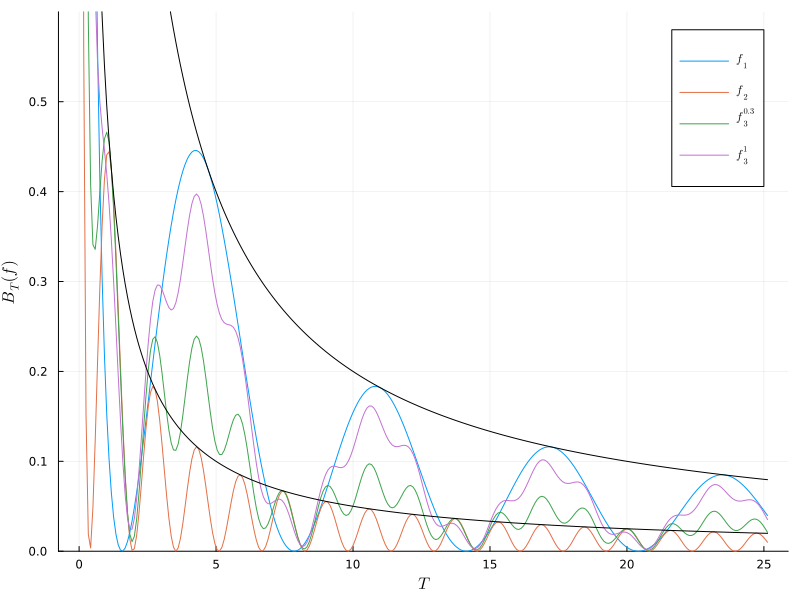

In [8]:
using Plots

fig = plot(aspect_ratio=:auto, ylims= (0,0.6), ylabel=L"B_T(f)", size=(800, 600), legendlabelspacing=10)


# Define the function to plot (sine function)
f_1(x) = (1-sin(x))/x
f_2(x) = (1-sin(4x))/(4x)
f_6(x) = 1/(sqrt(1+1))*(f_1(x) + f_2(x))

f_3(x) = 1/(sqrt(1+0.3^2))*(0.3f_1(x) + f_2(x))
f_4(x) = 1/(2*x)
f_5(x) = 2/x

# Generate x values
x = range(0, 8 * π, length=300)

# Create the plot
plot!(fig, x, f_1.(x), xlabel="T", label=L"f_1")
plot!(fig, x, f_2.(x), xlabel="T", label=L"f_2")
plot!(fig, x, f_3.(x), xlabel="T", label=L"f_3^{0.3}"*"\n")
plot!(fig, x, f_6.(x), xlabel="T", label=L"f_3^1")
plot!(fig, x, f_4.(x), xlabel="T", label="", c=:black)
plot!(fig, x, f_5.(x), xlabel=L"T", label="", c=:black)
# Birkhoff_Functions.savefig("LIP_motivating.pdf")

In [ ]:
# using Plots

# fig = plot(aspect_ratio=:auto, ylims= (-1,1), ylabel=L"f_1(t)")


# # Define the function to plot (sine function)
# f_1(x) = sin(x)
# # f_2(x) = (1-cos(4x))/(4x)
# # f_3(x) = f_1(x) + f_2(x)
# # f_4(x) = 1/2x
# # f_5(x) = 2/x

# # Generate x values
# x = range(0, 5 * π, length=300)

# # Create the plot
# plot!(fig, x, f_1.(x), xlabel="T", label=L"f_1")
# x_shaded = range(4 *pi, 5 *pi, length=100)
# # Plot and fill the area under the curve between the selected x-values
# plot!(x_shaded, f_1.(x_shaded), fillrange=0, fillalpha=0.3, label="", legend=false)
# hline!([0], label="", linestyle=:solid, color=:black)
# xticks!([2*pi, 4*pi, 5π], [L"2\pi", L"4\pi", L"5\pi"])

# # plot!(fig, x, f_2.(x), xlabel="T", label=L"f_2")
# # plot!(fig, x, f_3.(x), xlabel="T", label=L"f_3")
# # plot!(fig, x, f_4.(x), xlabel="T", label="", c=:black)
# # plot!(fig, x, f_5.(x), xlabel=L"T", label="", c=:black)
# Birkhoff_Functions.savefig("LIP_defn.pdf")

In [ ]:
# using Plots

# fig = plot(aspect_ratio=:auto, ylims= (-0.5,1.5), ylabel="Amplitude")

# v = 0.3
# f_1(x) = 90.250375777 * (1-v) *exp(-1/(x*(1-x)))+v
# f_2(x) = 1.57079632679*sin(pi * x)
# # f_3(x) = 1

# T = 59.6902604182#40.8407044967
# f_4(x) = f_1(x)*sin(T*x)
# # f_5(x) = 1.57079632679*sin(pi * x)*sin(T*x)
# # f_6(x) = sin(T*x)

# x = range(0, 1, length=300)

# # Create the plot
# plot!(fig, x, f_1.(x), xlabel="T", label=L"g_v") #C_0e^{-\frac{1}{t(1-t)}}
# # plot!(fig, x, f_2.(x), xlabel="T", label=L"g_2") #C_1\sin(\pi t)
# # plot!(fig, x, f_3.(x), xlabel="T", label=L"C_1\sin(\pi t)")
# plot!(fig, x, f_4.(x), xlabel="t", label=L"g_v\sin(Tt)")
# # plot!(fig, x, f_5.(x), xlabel="t", label=L"g_2\sin(Tt)")
# # plot!(fig, x, f_6.(x), xlabel="t", label=L"C_1\sin(\pi t)")
# hline!([0], label="", linestyle=:solid, color=:black)

# Birkhoff_Functions.savefig("LIP_weight_shift.pdf")